In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0) Load

In [2]:
path = '/Users/robertpinochetgomez/GitHub/time-series-analysis/00-data'

df_exports = pd.read_parquet(f'{path}/df_nsc_2025_until_w18.parquet')
df_exports['Week'] = df_exports['Week'].astype('int32')
df_exports.head()

,Country,Volume (KG),Kr/kg,Week,Product,Year,Continent
0,TOTALT,18407,67.23,1,FRESH WHOLE HON,2023,UNCLASSIFIED
1,EU27,13183,64.74,1,FRESH WHOLE HON,2023,EUROPE
2,POLEN,2223,61.44,1,FRESH WHOLE HON,2023,EUROPE
3,FRANKRIKE,2430,66.05,1,FRESH WHOLE HON,2023,EUROPE
4,NEDERLAND,1533,65.60,1,FRESH WHOLE HON,2023,EUROPE


(1) Plot ACF & PACF

- ACF

In [ ]:
df_totalt = (df_exports.loc[df_exports['Country'].isin(['TOTALT'])]).groupby(by=['Year', 'Week'], as_index=False).agg(
                                                        VolumeKG = ('Volume (KG)', 'sum')
)
df_totalt['Diff.'] = df_exports['Volume (KG)'].diff()

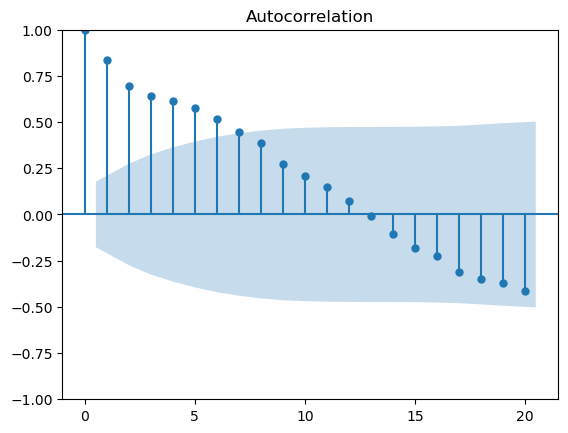

In [11]:
plot_acf(df_totalt['VolumeKG'].dropna(), lags=20)
plt.show()

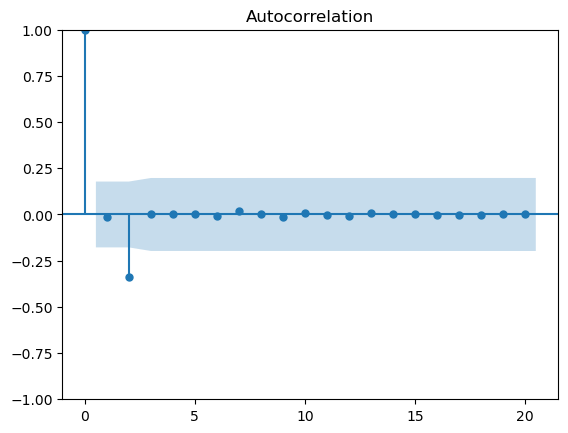

In [16]:
plot_acf(df_totalt['Diff.'].dropna(), lags=20)
plt.show()

Es interesante ver, que en los estadísticos de estacionalidad, la serie dice ser estacionaria a pesar de que ni siquiera esté transformada. Y al ver el gráfico ACF, se demuestra que rasgos de que no es estacionaria, dado que posee el patrón de tener correlaciones de que decrecen lentamente. 
Para el caso del parámetro, este será lag 2. 

- PACF

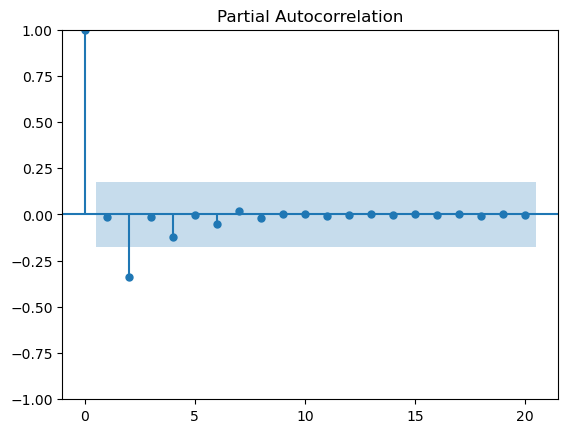

In [15]:
plot_pacf(df_totalt['Diff.'].dropna(), lags=20)
plt.show()

Mismo resultado, se utilizará lag 2. 

(2) Build ARIMA Model

In [24]:
train = df_totalt[:round(len(df_totalt)*70/100)]
test = df_totalt[round(len(df_totalt)*70/100):]

In [25]:
model = ARIMA(df_totalt['VolumeKG'], order=(2,1,2))
model_fit = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
